In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/crops.csv')
df

,Crop,ScientificName,Symbol,NuContAvailable,PlantPartHarvested,CropCategory,YieldUnit,AvYieldUnitWeight(lb),AvMoisture%,AvN%(dry),...,N%(wet)_M-FF,P%(wet)_M-FF,gP/100g(wet)_AgH8-9,gP/100g(wet)_AgH8-12,gP/100g(wet)_B788,P%(wet)_M&L,K%(wet)_M-FF,gK/100g(wet)_AgH8-9,gK/100g(wet)_AgH8-12,gK/100g(wet)_B788
0,Acorn,Quercus sp.,QUERC,"N,P,K",Fruit,Tree and fruit,lb of fruit,1.000,27.90,1.3647711512,...,NaN,NaN,NaN,0.079,NaN,NaN,NaN,NaN,0.539,NaN
1,"Alfalfa + Orchardgrass, for hay","Medicago sativa, Dactylis glomerata","MESA, DAGL","N,P",Aboveground biomass,Forage,ton,2000.000,9.70,2.4797142857,...,1.92,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Alfalfa + Orchardgrass, for hay (cut 1)","Medicago sativa, Dactylis glomerata","MESA, DAGL","N,P,K",Aboveground biomass,Forage,ton,2000.000,7.95,2.144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Alfalfa + Smooth Brome, for green chop","Medicago sativa, Bromus inermis","MESA, BRIN2","N,P,K",Aboveground biomass,Forage,ton,2000.000,77.63,3.3220740741,...,0.77,0.07,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN
4,"Alfalfa + Smooth Brome, for hay","Medicago sativa, Bromus inermis","MESA, BRIN2","N,P,K",Aboveground biomass,Forage,ton,2000.000,11.58,2.4177085202,...,1.89,0.20,NaN,NaN,NaN,NaN,1.66,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,"Wheat-Winter, for straw",Triticum sp.,TRITI,"N,P,K",Straw,Cereal and oil,lb straw/bu grain,92.475,9.22,0.6389573102,...,0.62,0.07,NaN,NaN,NaN,NaN,1.18,NaN,NaN,NaN
733,"Wildrice, for grain",Zizania palustris,ZIPA3,"N,P,K",Caryopsis,Cereal and oil,lb of caryopsis,1.000,37.50,2.64432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"Wildrice, for straw",Zizania palustris,ZIPA3,"N,P,K",Straw,Cereal and oil,lb straw/lb grain,1.310,9.20,0.809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,Yam,Dioscorea sp.,DIOSC,"N,P,K",Tuber,Vegetable,lb of tuber,1.000,74.00,1.1076923077,...,NaN,NaN,NaN,NaN,0.065,NaN,NaN,NaN,NaN,0.6


In [ ]:
df.shape

(737, 161)

Выведем столбцы

In [ ]:
[ col for col in df.columns]

['Crop',
 'ScientificName',
 'Symbol',
 'NuContAvailable',
 'PlantPartHarvested',
 'CropCategory',
 'YieldUnit',
 'AvYieldUnitWeight(lb)',
 'AvMoisture%',
 'AvN%(dry)',
 'AvP%(dry)',
 'AvK%(dry)',
 'YieldUnitWeight(lb)_set',
 'YieldUnitWeight(lb)_Bau',
 'YieldUnitWeight(lb)_Joh',
 'YieldUnitWeight(lb)_Roberts',
 'YieldUnitWeight(lb)_WEEP',
 'YieldUnitWeight(lb)_Men',
 'YieldUnitWeight(lb)_Guy',
 'YieldUnitWeight(lb)_Mc',
 'YieldUnitWeight(lb)_Mah',
 'YieldUnitWeight(lb)_Sha',
 'YieldUnitWeight(lb)_Sch',
 'YieldUnitWeight(lb)_Atu',
 'YieldUnitWeight(lb)_Zim',
 'YieldUnitWeight(lb)_Scu',
 'YieldUnitWeight(lb)_John',
 'YieldUnitWeight(lb)_Arc',
 'DryMatter%_M-FF',
 'DryMatter%_NAS',
 'DryMatter%_F&L',
 'DryMatter%_F&N',
 'DryMatter%_Alb',
 'DryMatter%_Est1',
 'DryMatter%_Est2',
 'DryMatter%_Est3',
 'DryMatter%_Est4',
 'DryMatter%_Est5',
 'DryMatter%_Est6',
 'DryMatter%_M&R',
 'DryMatter%_M&L',
 'DryMatter%_Sun',
 'DryMatter%_Gro',
 'DryMatter%_AgH8-9',
 'DryMatter%_AgH8-12',
 'DryMatter%_

Как видно из блока выше, в наборе данных много столбцов. Было принято решение ограничится следующими из них:

*   Crop (Культура)
*   PlantPartHarvested (Собранная часть растения)
*   CropCategory (Категория культуры)
*   AvMoisture% (Средняя влажнотсь)
*   AvN%(dry) (Среднее содержание Азота)
*   AvP%(dry) (Среднее содержание Фосфора)
*   AvK%(dry) (Среднее содержание Калия)



In [ ]:
df1 = df[[
 'Crop',
 'PlantPartHarvested',
 'CropCategory',
 'AvMoisture%',
 'AvN%(dry)',
 'AvP%(dry)',
 'AvK%(dry)',
]]

df1

,Crop,PlantPartHarvested,CropCategory,AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry)
0,Acorn,Fruit,Tree and fruit,27.90,1.3647711512,0.10957004161,0.74757281553
1,"Alfalfa + Orchardgrass, for hay",Aboveground biomass,Forage,9.70,2.4797142857,0.26785714286,#DIV/0!
2,"Alfalfa + Orchardgrass, for hay (cut 1)",Aboveground biomass,Forage,7.95,2.144,0.2,1.49
3,"Alfalfa + Smooth Brome, for green chop",Aboveground biomass,Forage,77.63,3.3220740741,0.31055555556,2.8
4,"Alfalfa + Smooth Brome, for hay",Aboveground biomass,Forage,11.58,2.4177085202,0.27105381166,1.8977466368
...,...,...,...,...,...,...,...
732,"Wheat-Winter, for straw",Straw,Cereal and oil,9.22,0.6389573102,0.063898488121,1.173574514
733,"Wildrice, for grain",Caryopsis,Cereal and oil,37.50,2.64432,0.4995,0.489
734,"Wildrice, for straw",Straw,Cereal and oil,9.20,0.809,0.11,0.788
735,Yam,Tuber,Vegetable,74.00,1.1076923077,0.25,2.3076923077


Проверка наличия нулевых и NaN значений

In [ ]:
df1.isnull().sum()

Crop                  0
PlantPartHarvested    0
CropCategory          0
AvMoisture%           0
AvN%(dry)             0
AvP%(dry)             0
AvK%(dry)             0
dtype: int64

In [ ]:
df1.isna().sum()

Crop                  0
PlantPartHarvested    0
CropCategory          0
AvMoisture%           0
AvN%(dry)             0
AvP%(dry)             0
AvK%(dry)             0
dtype: int64

Выведем типы данных

In [ ]:
df1.dtypes

Crop                   object
PlantPartHarvested     object
CropCategory           object
AvMoisture%           float64
AvN%(dry)              object
AvP%(dry)              object
AvK%(dry)              object
dtype: object

Заметим, что pandas рассматривает столбцы питательных веществ (N, P, K) как объекты. Как видно из предпросмотра df1 - #DIV/0! (неверное значение) содержится в столбце AvK% в 1ой строке. Выясним, распространено ли это во всем наборе данных для (N, P, K).

In [ ]:
print("AvN%(dry): ", df1[df1["AvN%(dry)"] == '#DIV/0!'].shape[0])
print("AvP%(dry): ", df1[df1["AvP%(dry)"] == '#DIV/0!'].shape[0])
print("AvK%(dry): ", df1[df1["AvK%(dry)"] == '#DIV/0!'].shape[0])

AvN%(dry):  9
AvP%(dry):  126
AvK%(dry):  205


Обнаружим, что #DIV/0! значения имеются в любой из колонок питательных веществ

Вернемся к исходному набору данных и посмтрим столбец NuContAvailable который показывает доступные питательные вещества. Выведем его вместе со столбцами среднего содержания питательных веществ

In [ ]:
nutrients_df = df[['NuContAvailable', 'AvN%(dry)', 'AvP%(dry)', 'AvK%(dry)']]
nutrients_df.head()

,NuContAvailable,AvN%(dry),AvP%(dry),AvK%(dry)
0,"N,P,K",1.3647711512,0.10957004161,0.74757281553
1,"N,P",2.4797142857,0.26785714286,#DIV/0!
2,"N,P,K",2.144,0.2,1.49
3,"N,P,K",3.3220740741,0.31055555556,2.8
4,"N,P,K",2.4177085202,0.27105381166,1.8977466368


Из 1ой строки видно, что #DIV/0! находится на пересечении AvK%(dry) и N,P (без K) в NuContAvailable, в отличии от остальных строк где K имеется в NuContAvailable

Сделаем замену #DIV/0! значений нулевыми значениями. Это согласуется с выводом NuContAvailable, поскольку, если урожай не имеет определенного содержания питательных веществ, то он имеет 0% от него

In [ ]:
df2 = df1.replace("#DIV/0!", 0)

print("AvN%(dry): ", df2[df2["AvN%(dry)"] == '#DIV/0!'].shape[0])
print("AvP%(dry): ", df2[df2["AvP%(dry)"] == '#DIV/0!'].shape[0])
print("AvK%(dry): ", df2[df2["AvK%(dry)"] == '#DIV/0!'].shape[0])

AvN%(dry):  0
AvP%(dry):  0
AvK%(dry):  0


Теперь можем привести к числовому типу эти столбцы, для использоваться в нашем анализе.

In [ ]:
df2 = df2.astype({"AvN%(dry)": np.float64, "AvP%(dry)": np.float64, "AvK%(dry)": np.float64})
df2.dtypes

Crop                   object
PlantPartHarvested     object
CropCategory           object
AvMoisture%           float64
AvN%(dry)             float64
AvP%(dry)             float64
AvK%(dry)             float64
dtype: object

In [ ]:
df2

,Crop,PlantPartHarvested,CropCategory,AvMoisture%,AvN%(dry),AvP%(dry),AvK%(dry)
0,Acorn,Fruit,Tree and fruit,27.90,1.364771,0.109570,0.747573
1,"Alfalfa + Orchardgrass, for hay",Aboveground biomass,Forage,9.70,2.479714,0.267857,0.000000
2,"Alfalfa + Orchardgrass, for hay (cut 1)",Aboveground biomass,Forage,7.95,2.144000,0.200000,1.490000
3,"Alfalfa + Smooth Brome, for green chop",Aboveground biomass,Forage,77.63,3.322074,0.310556,2.800000
4,"Alfalfa + Smooth Brome, for hay",Aboveground biomass,Forage,11.58,2.417709,0.271054,1.897747
...,...,...,...,...,...,...,...
732,"Wheat-Winter, for straw",Straw,Cereal and oil,9.22,0.638957,0.063898,1.173575
733,"Wildrice, for grain",Caryopsis,Cereal and oil,37.50,2.644320,0.499500,0.489000
734,"Wildrice, for straw",Straw,Cereal and oil,9.20,0.809000,0.110000,0.788000
735,Yam,Tuber,Vegetable,74.00,1.107692,0.250000,2.307692


Рассмотрим столбцы категорий — PlantPartHarvested и CropCategory.

In [ ]:
df2.PlantPartHarvested.value_counts()

Aboveground biomass               443
Fruit                             126
Seed                               30
Straw                              26
Leaf                               13
Caryopsis                          13
Nut                                10
Root                               10
Floret                             10
Stover                              8
Bulb                                6
Head                                4
Head (terminal bud and leaves)      4
Stem and leaf                       3
Stem                                3
Tuber                               3
Corm                                3
Petiole                             3
Leafy head                          2
Stalk and leaf                      2
Shoot (immature)                    2
Bud                                 2
Inflorescence                       1
Ear and husk                        1
Seed and lint                       1
Leaf and petiole                    1
Stem and flo

In [ ]:
df2.CropCategory.value_counts()

Forage                     444
Vegetable                  118
Tree and fruit             103
Cereal and oil              53
Fiber and miscellaneous     19
Name: CropCategory, dtype: int64

Если для CropCategory у нас пять категорий, то для PlantPartHarvested у нас много категорий. Чтобы упростить ситуацию, уменьшим кол-во категорий PlantPartHarvested - мы будем учитывать пять первых категорий из него, а остальные значения объеденим в 6-тую категорию "Others"(Другие).

In [ ]:
plantpart_counts = { key:i for key, i in zip(df2.PlantPartHarvested.value_counts().index[:5], range(5)) }

def get_plantpart_classif(val):
    try:
        plantpart_counts[val]
        return val
    except:
        return "Others"
    
df2['PlantPartClassif'] = df2['PlantPartHarvested'].apply(get_plantpart_classif)
df2.PlantPartClassif.value_counts()

Aboveground biomass    443
Fruit                  126
Others                  99
Seed                    30
Straw                   26
Leaf                    13
Name: PlantPartClassif, dtype: int64

Гипотеза 1: Средняя влажнотсь в зависимости от различных частей растения

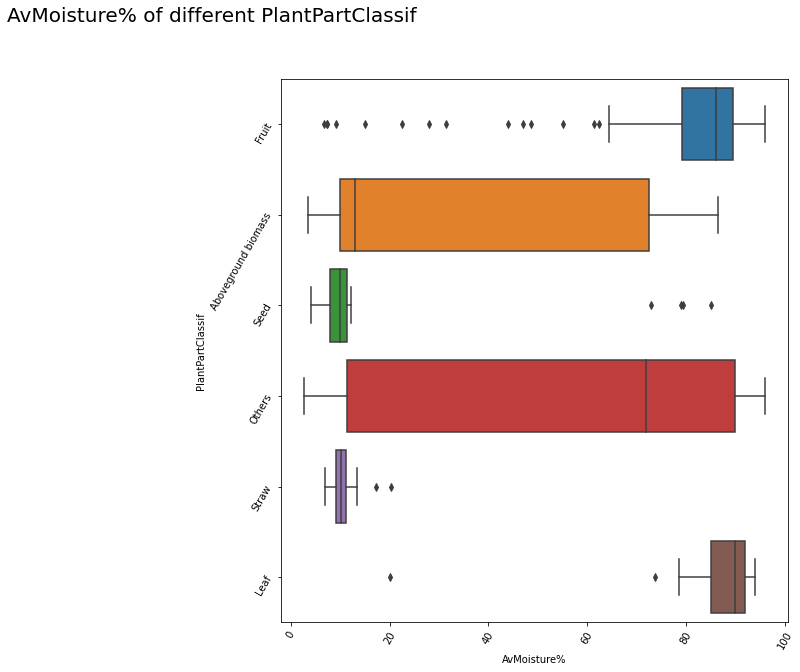

In [ ]:
def plot_strip_box(x, y):
    """
    Create a strip plot and box plot for the given x and y values
    """
    
    fig= plt.subplots(figsize=(20, 10))
    plt.subplots_adjust(hspace=0.3)

    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(x = df2[x], y = df2[y])
    plt.tick_params(rotation=60, labelsize=10)

    plt.suptitle("{} of different {}".format(x,y), fontsize=20)
    plt.show()

plot_strip_box("AvMoisture%", "PlantPartClassif")


Рассматривая распределение средней влажности культур с различными собранными частями растений, мы можем классифицировать их на те, которые имеют низкую потребность во влаге - Seed и Straw (солома и семена), высокую потребность во влаге - Leaf и Fruit (листья и плоды), и те, которые охватывают как низкие, так и высокие значения - Aboveground biomass и Others (надземная биомасса и другие).

Можно заметить, что те части растения, которые нуждаются в меньшем количестве влаги, более приспособлены к более сухим условиям. Семена способны выживать в более сухих районах до того момента, когда условия станут подходящими для их роста, а солома (Соло́ма — сухие стебли злаковых и бобовых зерновых культур) происходит из стебля растения, который обычно жесткий, чтобы держать растение в вертикальном положении и защищать его от внешних угроз, таких как укусы животных.

Мы также можем применить эту схему на категории культур:
 cereal and oil (зерновые и масличные) требуют меньше влаги, tree, fruit and vegetables (деревья, фрукты и овощи) - больше, а остальные категории находятся между низким и почти высоким уровнем влажности.

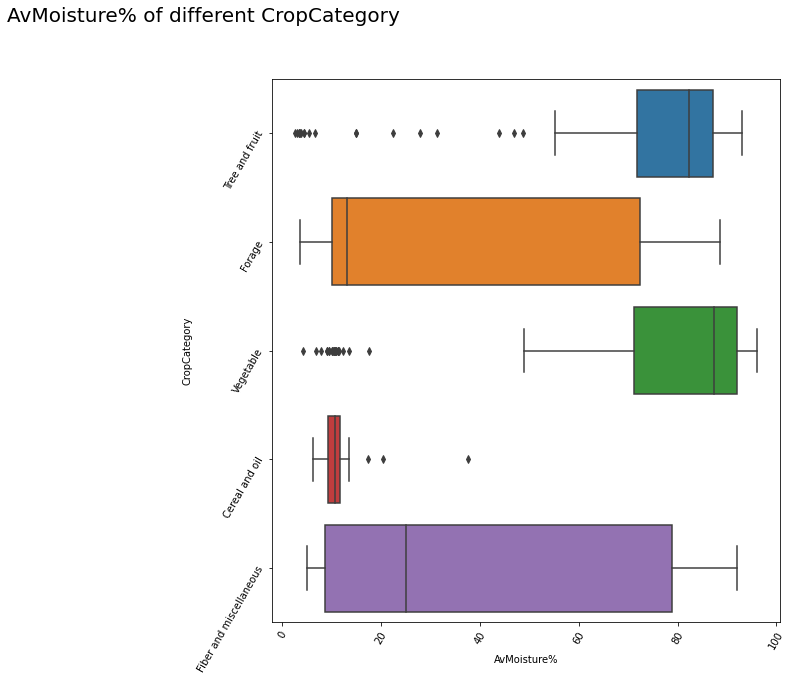

In [ ]:
plot_strip_box("AvMoisture%", "CropCategory")

Гипотеза 2: Средний уровень содержания азота для различных частей растений и категорий культур

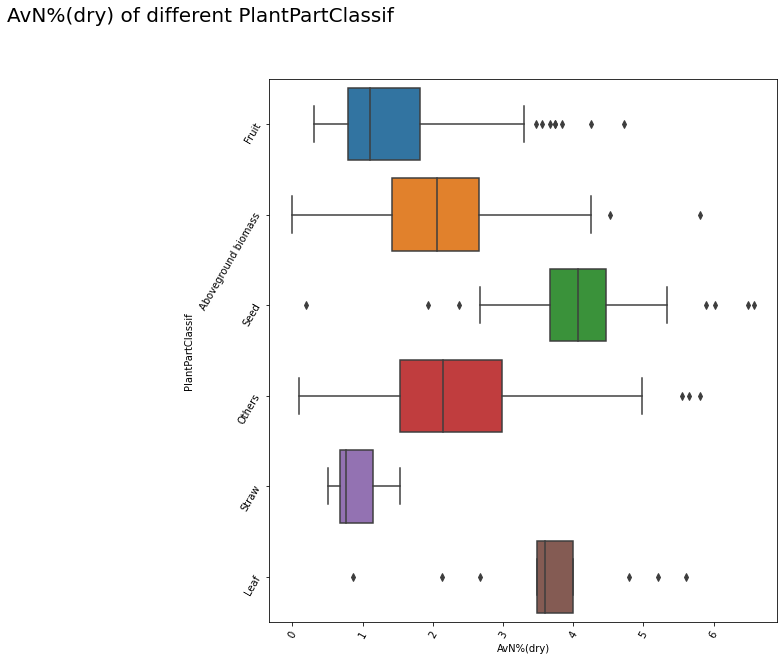

In [ ]:
plot_strip_box("AvN%(dry)", "PlantPartClassif")

Для среднего уровеня содержания азота для различных частей растения мы видим, что распределение для первых четырех категорий является более распределенным, с диапазоном около .75-1.5. Последние две категории распределены более тесно, причем Leaf (лист) имеет наименьшее расстояние между квартилями, но при этом имеет исключения, которые охватывают высокие и низкие области. Кроме того, можно также сказать, что части растения не превышают среднее значение уровеня содержания азота в 5%.

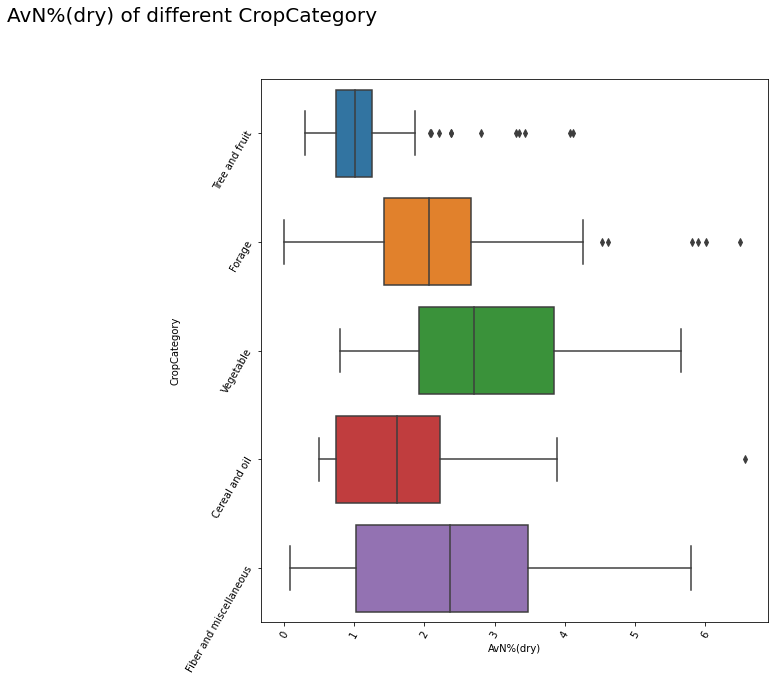

In [ ]:
plot_strip_box("AvN%(dry)", "CropCategory")

Как и части растений, большинство категорий культур также хорошо распределены по средним значениям азота от 0-5%.

Гипотеза 3: Средний уровень содержания фосфора для различных частей растений и категорий культур

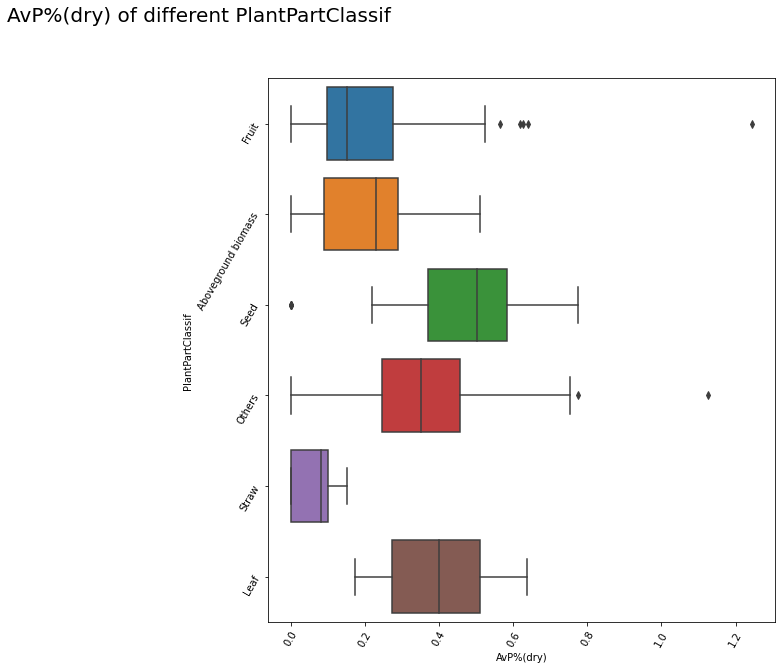

In [ ]:
plot_strip_box("AvP%(dry)", "PlantPartClassif")

Среднее значение уровеня содержания фосфора для всех частей растений не превышает 1,2%, что говорит о том, что сельскохозяйственные культуры нуждаются лишь в очень мизерном количестве этого элемента. Большинство значений распределено в диапазоне 0-0,6%.

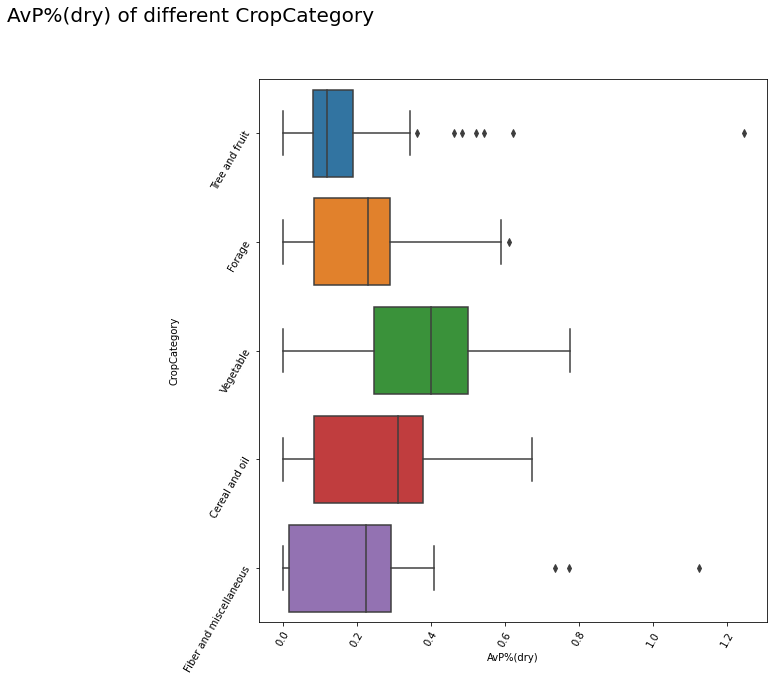

In [ ]:
plot_strip_box("AvP%(dry)", "CropCategory")

То же самое можно сказать и о различных категориях культур, хотя на этот раз большинство значений распределено в диапазоне 0-0,5%.

Гипотеза 4: Средний уровень содержания калия для различных частей растений и категорий культур

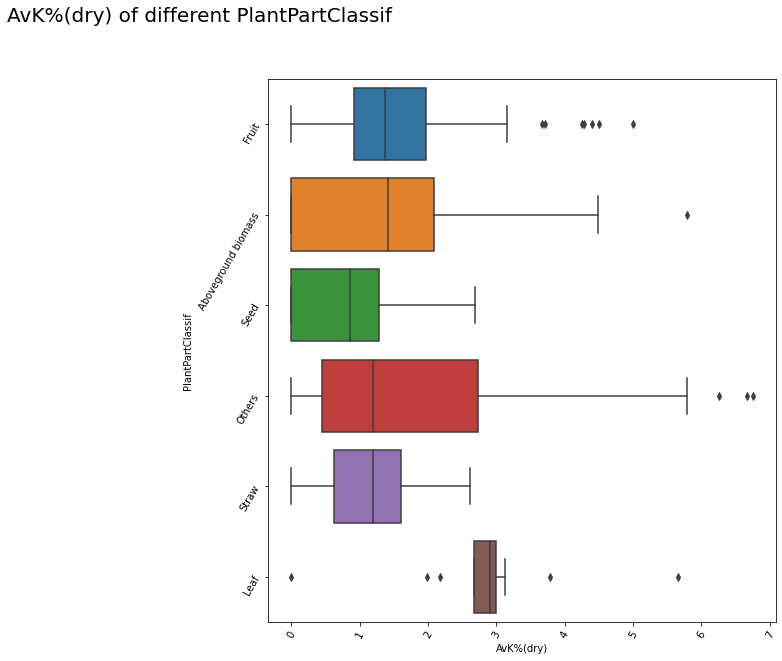

In [ ]:
plot_strip_box("AvK%(dry)", "PlantPartClassif")


Для среднего значения калия все части растения, кроме листа, имеют медиану в пределах 1-2%. Заметно большее распределение частей растений, не входящих в четыре лучшие категории Others (Другие).

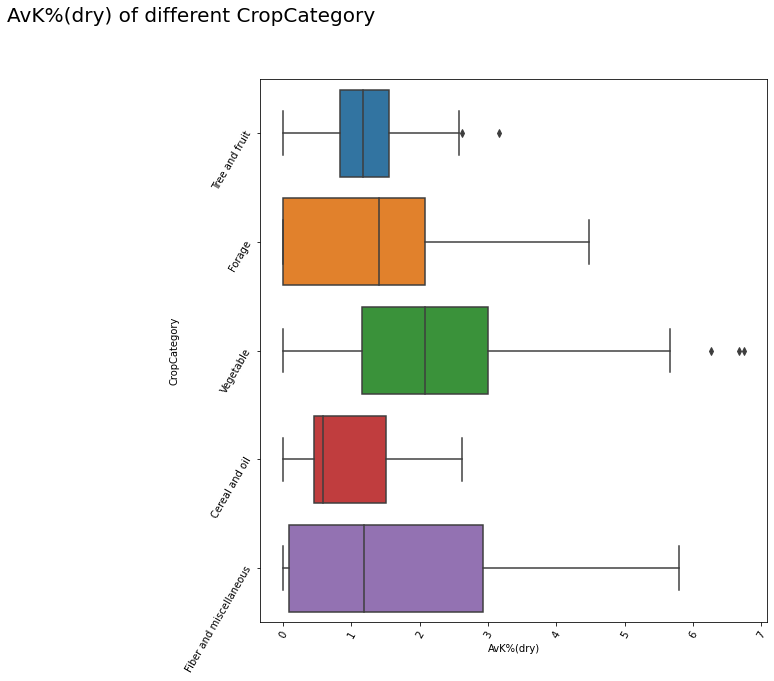

In [ ]:
plot_strip_box("AvK%(dry)", "CropCategory")

С другой стороны, различные категории культур распределены более равномерно.